In [46]:
import pandas as pd
import seaborn as sns

In [47]:
data = pd.read_csv('./Data/house_raw.csv')
data.head()

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000
2,35,5.1155,0.249061,1.902676,3.888078,500000
3,32,4.7109,0.231383,1.913669,4.508393,500000
4,21,4.5625,0.255583,3.092664,4.667954,500000


In [48]:
data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000
mean,27.307022,3.664086,0.214309,3.007667,5.370672,188692.620130
std,11.297204,1.526694,0.055251,4.579534,2.332776,95318.621139
min,1.000000,0.499900,0.100000,0.692308,0.846154,14999.000000
25%,18.000000,2.526125,0.177544,2.467031,4.426115,114325.000000
50%,28.000000,3.447800,0.204256,2.853499,5.199222,170800.000000
75%,36.000000,4.583300,0.240476,3.318866,5.970848,242100.000000
max,51.000000,9.905500,1.000000,599.714286,132.533333,500000.000000


<Axes: ylabel='Frequency'>

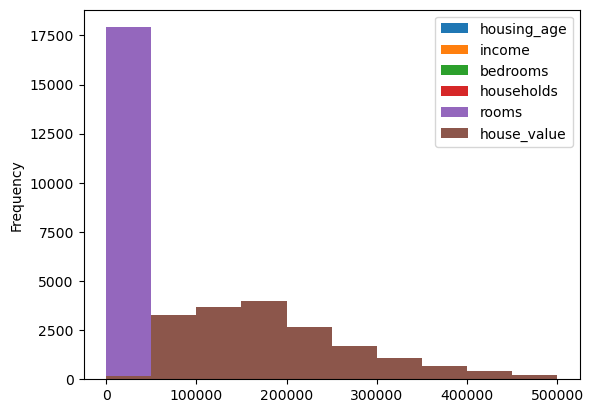

In [49]:
data.plot.hist()

In [50]:
# sns.lineplot(data = data, y='housing_age', x='house_value')

In [51]:
data.isnull().sum()

housing_age    0
income         0
bedrooms       0
households     0
rooms          0
house_value    0
dtype: int64

In [52]:
data.count()

housing_age    17914
income         17914
bedrooms       17914
households     17914
rooms          17914
house_value    17914
dtype: int64

In [53]:
X = data[data.columns[0:5]]
Y = data['house_value']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

In [56]:
#데이터 정규화(min-max)를 위한 라이브러리 설정
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()

In [64]:
#훈련 데이터 및 테스트 데이터 정규화
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)
X_scalered_minmax_test = scaler_minmax.transform(X_test)

In [65]:
#선형 회귀모델 적용
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_scaled_minmax_train, Y_train)

LinearRegression()

In [69]:
#훈련 데이터의 정확도(R-square : 설명력) 확인
pred_train = model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, Y_train)

0.5463729131516732

In [70]:
#테스트 데이터의 정확도 (R-square : 설명력) 확인
pred_test = model.predict(X_scalered_minmax_test)
model.score(X_scalered_minmax_test, Y_test)

-2.8220648010161558

<Axes: >

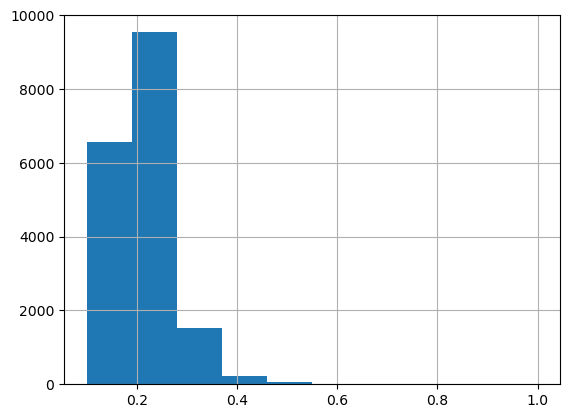

In [73]:
data['bedrooms'].hist()

<Axes: >

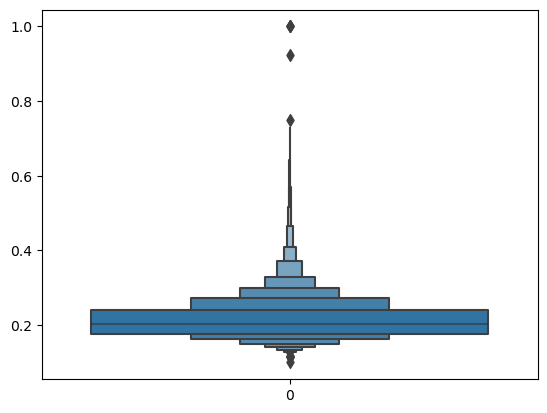

In [74]:
sns.boxenplot(data['bedrooms'])

<Axes: >

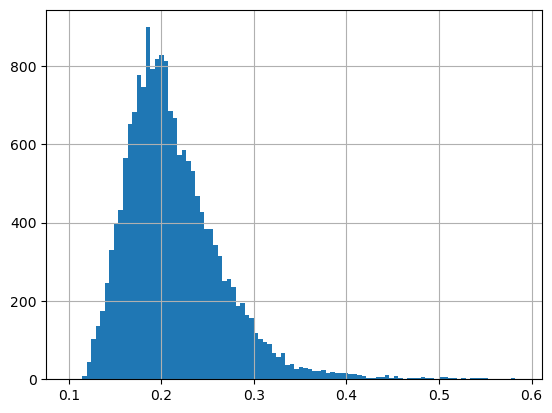

In [77]:
data_bedroom = data[data['bedrooms']<0.6]
data_bedroom['bedrooms'].hist(bins=100)

In [98]:
data_bedroom2 = data[data['bedrooms']>=0.4]
print(data_bedroom2['bedrooms'].value_counts())

1.000000    3
0.500000    2
0.402102    2
0.407076    1
0.444946    1
           ..
0.409407    1
0.502682    1
0.404008    1
0.406295    1
0.750000    1
Name: bedrooms, Length: 169, dtype: int64


<Axes: >

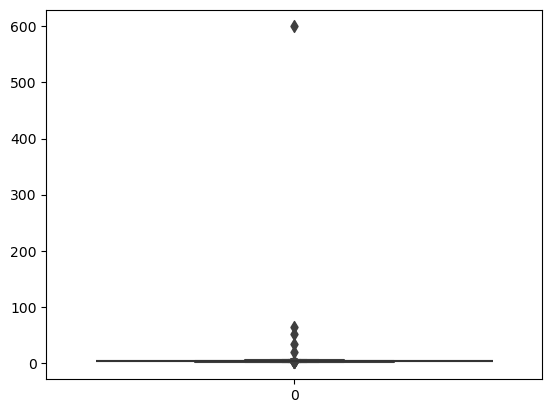

In [99]:
sns.boxenplot(data['households'])

<Axes: >

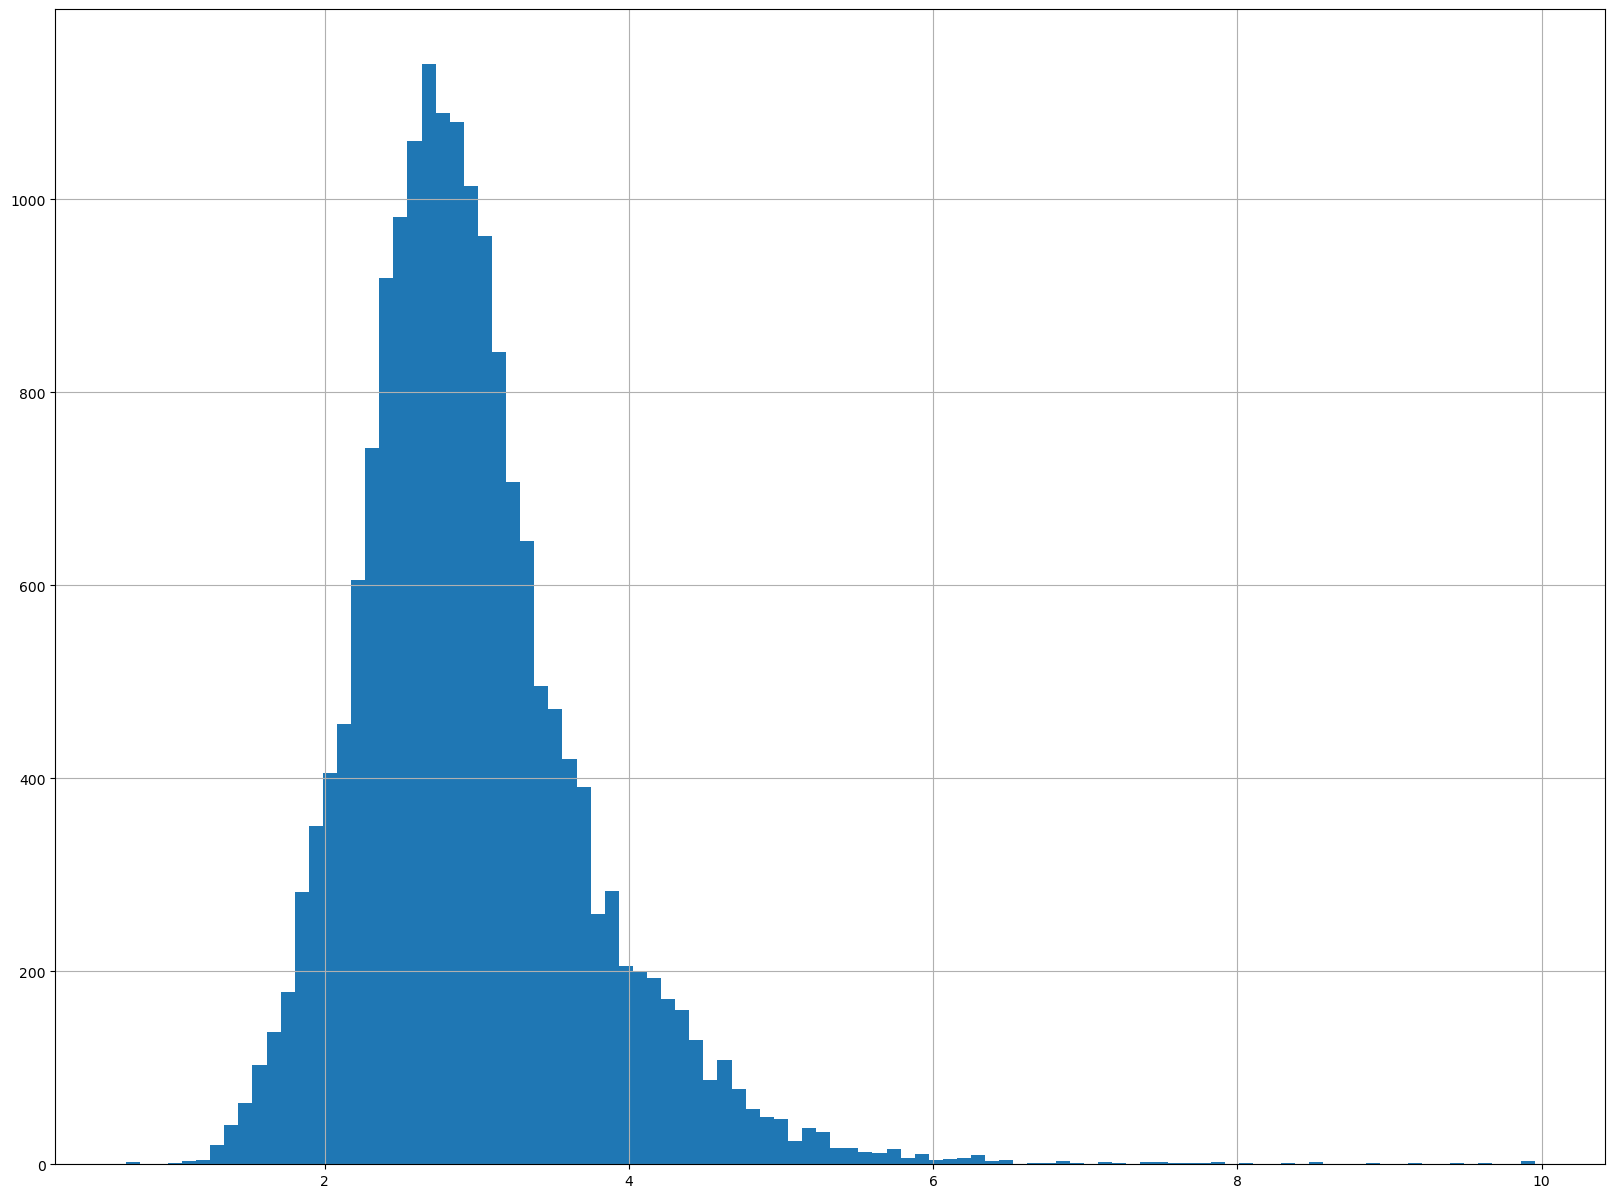

In [107]:
data_households = data[data['households']<10]
data_households['households'].hist(bins=100, figsize=(20,15))

In [111]:
data_households2 = data[data['households']>=10]
print(data_households2.value_counts().sum())
data.describe()

22


,housing_age,income,bedrooms,households,rooms,house_value
count,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000
mean,27.307022,3.664086,0.214309,3.007667,5.370672,188692.620130
std,11.297204,1.526694,0.055251,4.579534,2.332776,95318.621139
min,1.000000,0.499900,0.100000,0.692308,0.846154,14999.000000
25%,18.000000,2.526125,0.177544,2.467031,4.426115,114325.000000
50%,28.000000,3.447800,0.204256,2.853499,5.199222,170800.000000
75%,36.000000,4.583300,0.240476,3.318866,5.970848,242100.000000
max,51.000000,9.905500,1.000000,599.714286,132.533333,500000.000000


<Axes: >

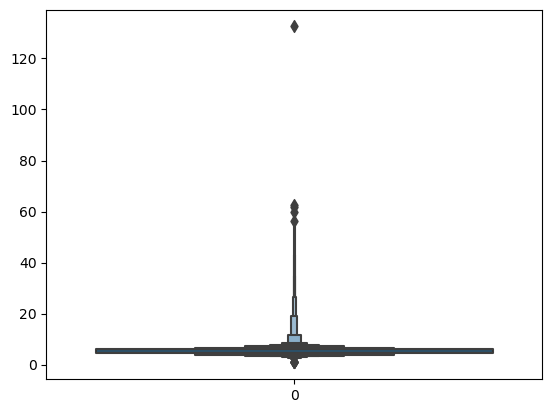

In [112]:
sns.boxenplot(data['rooms'])

<Axes: >

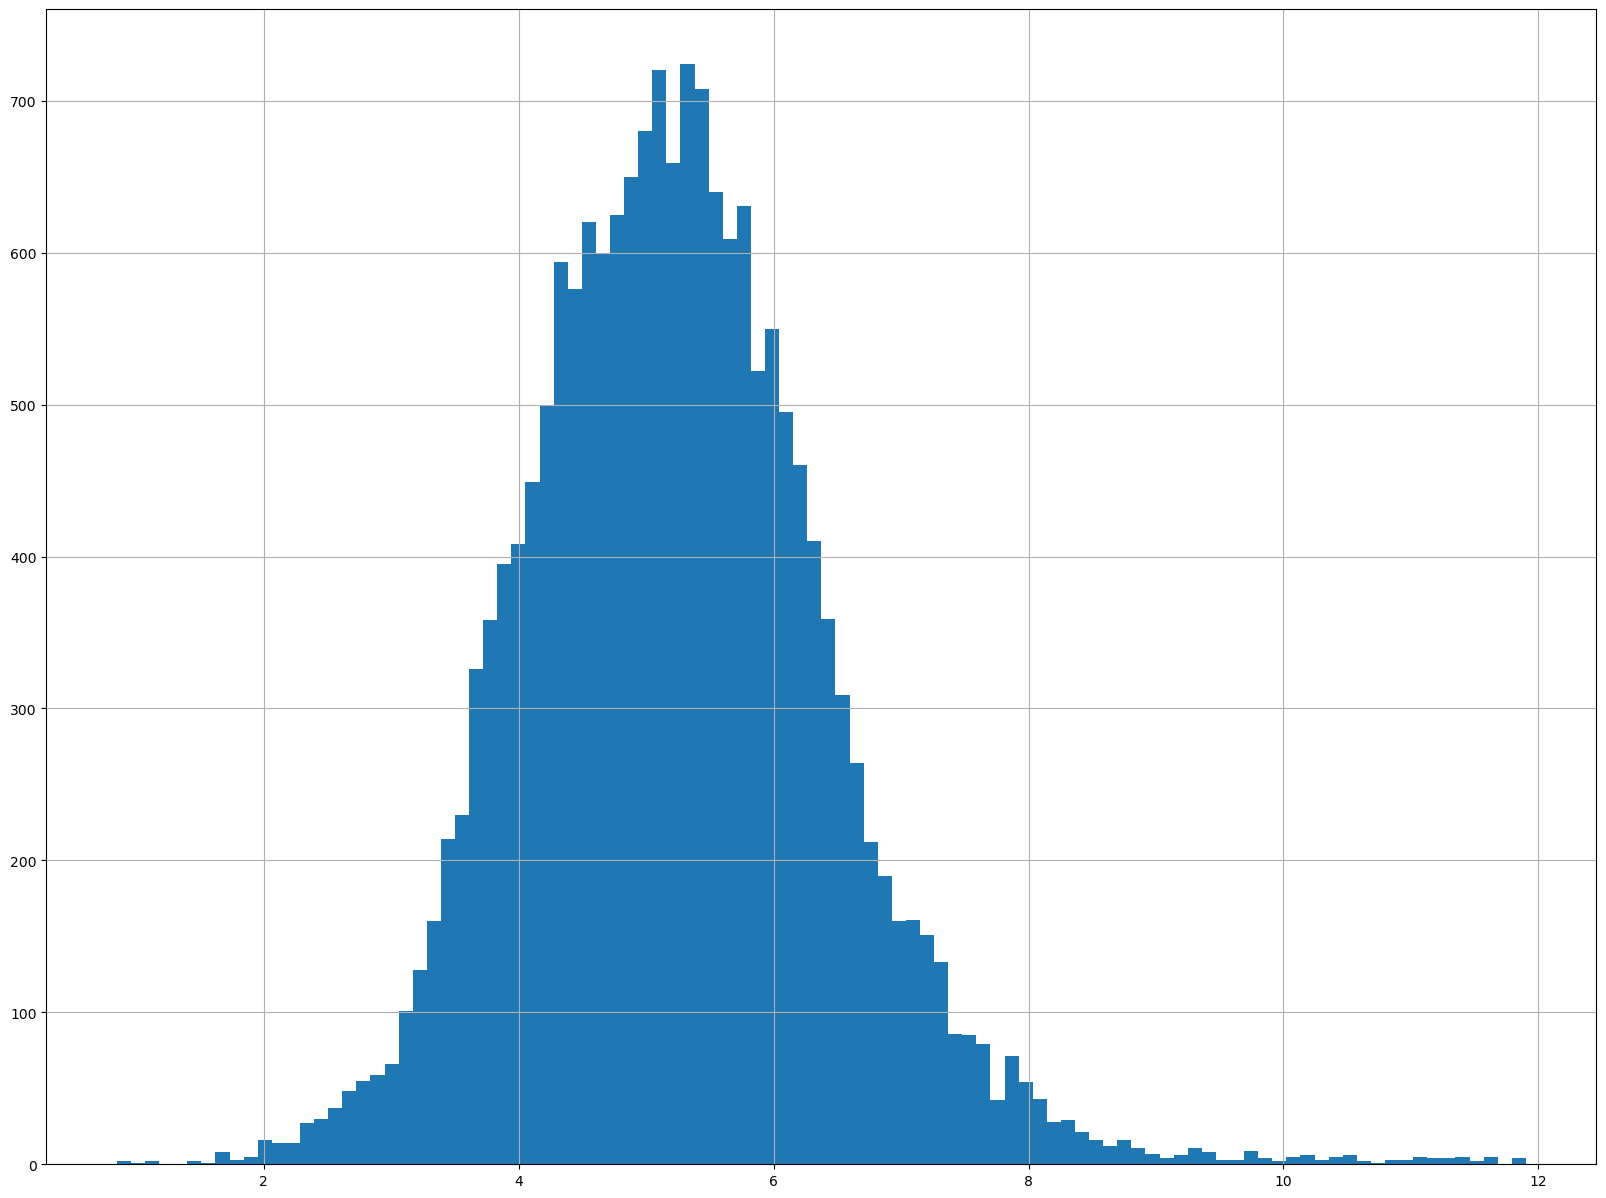

In [134]:
data_rooms = data[data['rooms']<12]
data_rooms['rooms'].hist(bins=100, figsize=(20,15))

In [135]:
data_rooms2 = data[data['rooms']>=20]
print(data_rooms2.value_counts())
# data_rooms2['rooms'].hist(bins=100, figsize=(20,15))

housing_age  income  bedrooms  households  rooms      house_value
1            4.2500  0.145519  3.589286    20.125000  189200         1
5            4.0132  0.177403  2.598174    26.511416  163100         1
17           2.4028  0.305361  1.740741    31.777778  67500          1
             3.9722  0.172642  2.608355    20.900783  313400         1
             6.2233  0.154475  3.010893    20.520697  230900         1
                                                                    ..
16           0.4999  0.277372  1.368421    21.631579  73500          1
             2.1042  0.247813  2.071429    24.500000  87500          1
             3.0000  0.205069  2.095238    41.333333  175000         1
             3.1500  0.178325  1.980392    29.852941  140600         1
44           4.1838  0.229126  2.913043    26.452174  85600          1
Length: 64, dtype: int64


In [141]:
new_data = data[(data['bedrooms']<0.4) & (data['households']<10) & (data['rooms']<12)]
new_data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17589.000000,17589.000000,17589.000000,17589.000000,17589.000000,17589.000000
mean,27.355279,3.683829,0.211754,2.958894,5.262560,188921.723691
std,11.285629,1.522218,0.047869,0.752929,1.166793,95521.609151
min,1.000000,0.499900,0.100000,0.750000,1.714286,14999.000000
25%,18.000000,2.545500,0.177295,2.471519,4.443625,114300.000000
50%,28.000000,3.470300,0.203687,2.855042,5.202581,170800.000000
75%,36.000000,4.604200,0.239247,3.317308,5.959596,242700.000000
max,51.000000,9.905500,0.399064,9.954545,11.901869,500000.000000


array([[<Axes: title={'center': 'housing_age'}>,
        <Axes: title={'center': 'income'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'households'}>],
       [<Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'house_value'}>]], dtype=object)

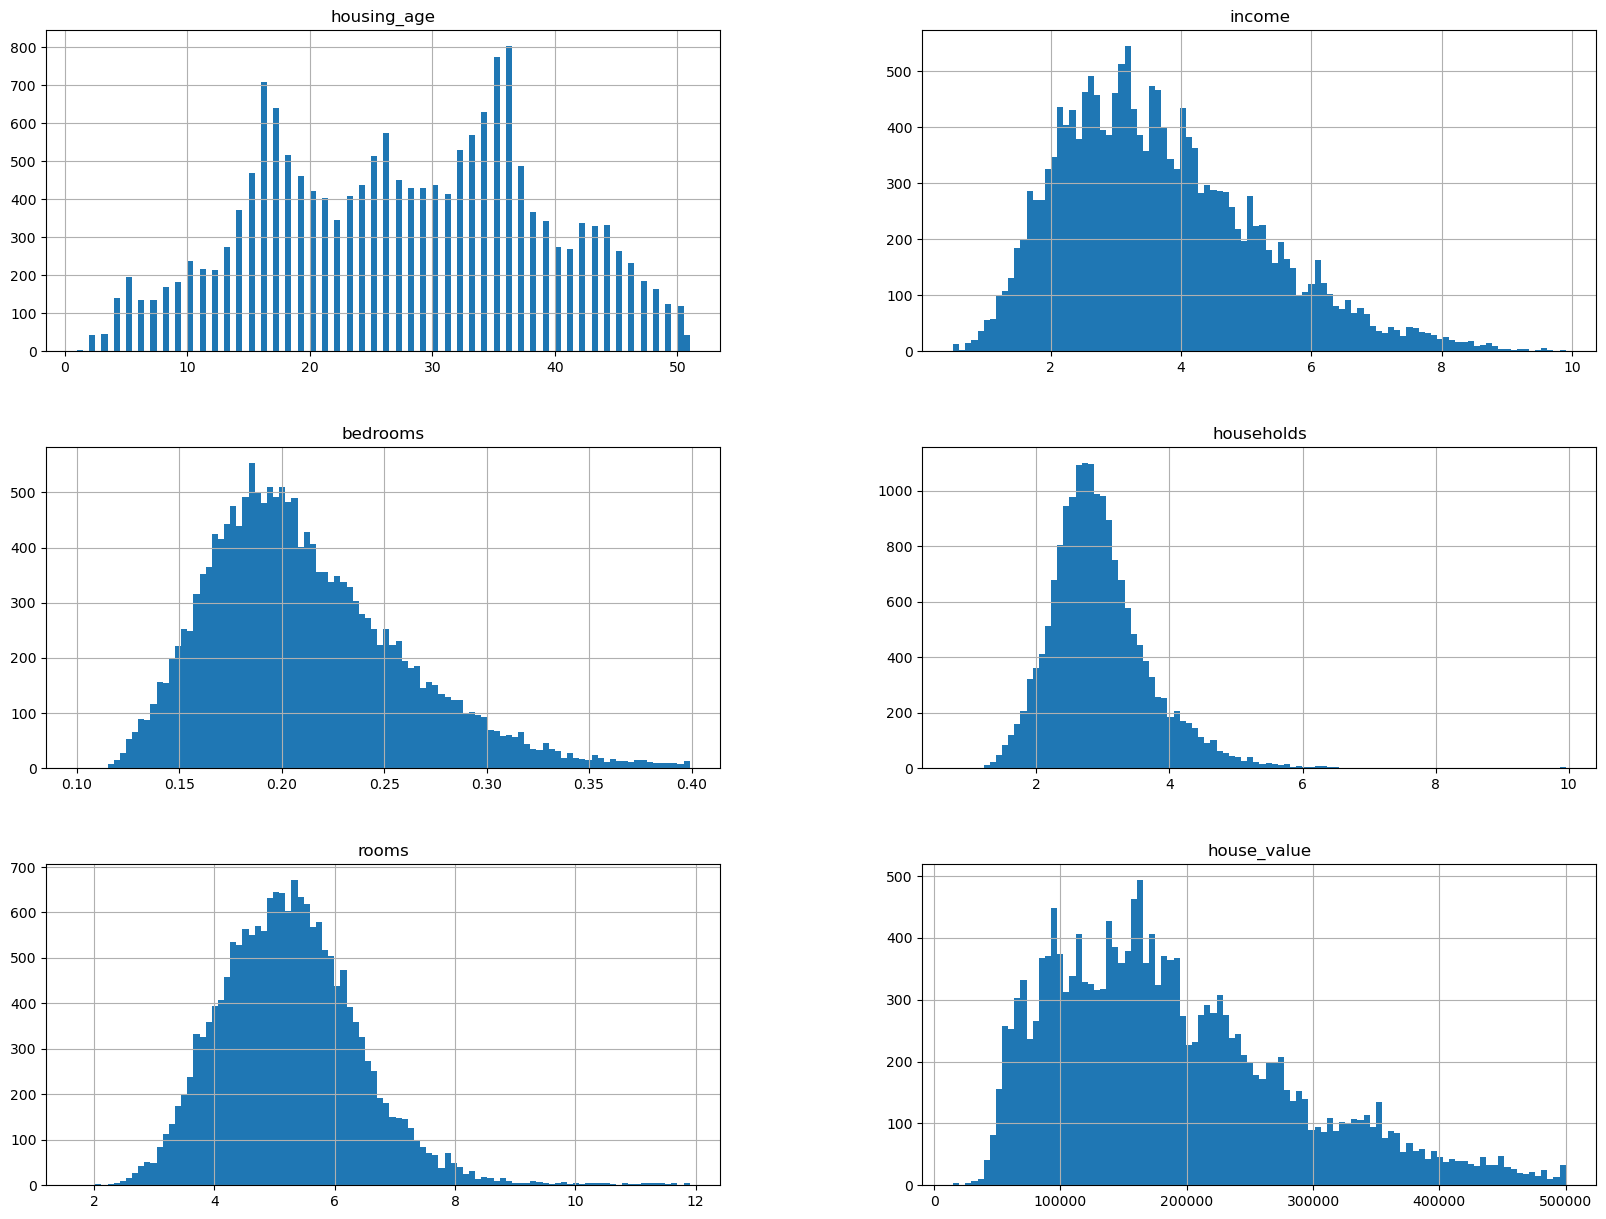

In [143]:
new_data.hist(bins=100, figsize=(20, 15))

In [172]:
x = data[data.columns[0:5]]
y = data['house_value']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [175]:
scaler_minmax.fit(x_train)
x_scaled_minmax_train = scaler_minmax.transform(x_train)
x_scaled_minmax_test = scaler_minmax.transform(x_test)

In [176]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_scaled_minmax_train, y_train)


LinearRegression()

ValueError: Found input variables with inconsistent numbers of samples: [4479, 13435]

In [163]:
pred_train = model.predict(x_scaled_minmax_train)
model.score(x_scaled_minmax_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [13435, 4479]

In [ ]:
#테스트 데이터의 정확도 (R-square : 설명력) 확인
pred_test = model.predict(x_scalered_minmax_test)
model.score(x_scalered_minmax_test, Y_test)
#훈련 데이터의 정확도(R-square : 설명력) 확인
pred_train = model.predict(x_scaled_minmax_train)
model.score(x_scaled_minmax_train, Y_train)
#선형 회귀모델 적용
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_scaled_minmax_train, Y_train)
#훈련 데이터 및 테스트 데이터 정규화
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)
X_scalered_minmax_test = scaler_minmax.transform(X_test)